## Toronto Building Permits

- Loading
- Missing Values
- Cleaning
- Visualizations
- Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from scipy import stats

In [4]:
#Load dataset from TBP csv
df = pd.read_csv('Toronto Building Permits.csv')

In [5]:
df.head()

,PERMIT_NUM,REVISION_NUM,PERMIT_TYPE,STRUCTURE_TYPE,WORK,STREET_NUM,STREET_NAME,STREET_TYPE,STREET_DIRECTION,POSTAL,...,DWELLING_UNITS_LOST,EST_CONST_COST,ASSEMBLY,INSTITUTIONAL,RESIDENTIAL,BUSINESS_AND_PERSONAL_SERVICES,MERCANTILE,INDUSTRIAL,INTERIOR_ALTERATIONS,DEMOLITION
0,00 119016 000,0,Residential Building Permit,SFD/Detached,New Building,548,BROOKDALE,AVE,,M5M,...,NaN,300000,0.0,0.0,285.40,0.0,0.0,0.0,0.0,0.0
1,00 123861 PLB,0,Plumbing(PS),Warehouse,Install/Alter Plumbing - only,885,LOGAN,AVE,,M4K,...,NaN,3000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,00 124060 CMB,0,Residential Building Permit,SFD - Detached,New Building,361,JOICEY,BLVD,,M5M,...,NaN,"250,000",0.0,0.0,270.92,0.0,0.0,0.0,0.0,0.0
3,00 125516 CMB,2,Non-Residential Building Permit,Mixed Industrial Use,Alteration to Existing Building,2,WICKMAN,RD,,,...,NaN,10000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,00 125516 CMB,0,Non-Residential Building Permit,Exterior Storage Tank,Alteration to Existing Building,2,WICKMAN,RD,,,...,NaN,100000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [6]:
df.tail()

,PERMIT_NUM,REVISION_NUM,PERMIT_TYPE,STRUCTURE_TYPE,WORK,STREET_NUM,STREET_NAME,STREET_TYPE,STREET_DIRECTION,POSTAL,...,DWELLING_UNITS_LOST,EST_CONST_COST,ASSEMBLY,INSTITUTIONAL,RESIDENTIAL,BUSINESS_AND_PERSONAL_SERVICES,MERCANTILE,INDUSTRIAL,INTERIOR_ALTERATIONS,DEMOLITION
32572,99 251937 BLD,0,Small Residential Projects,SFD - Detached,Interior Alterations,7,BROOKE,AVE,,M5M,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32573,99 251943 BLD,0,Small Residential Projects,SFD - Detached,Interior Alterations,452,GLENGARRY,AVE,,M5M,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32574,99 251946 BLD,0,Small Residential Projects,SFD - Detached,Interior Alterations,375,OLD ORCHARD,GRV,,M5M,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32575,99 251948 BLD,0,Small Residential Projects,SFD - Detached,Interior Alterations,522,FAIRLAWN,AVE,,M5M,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32576,99 251951 BLD,0,Small Residential Projects,SFD - Detached,Interior Alterations,355,CRANBROOKE,AVE,,M5M,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32577 entries, 0 to 32576
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PERMIT_NUM                      32577 non-null  object 
 1   REVISION_NUM                    32577 non-null  object 
 2   PERMIT_TYPE                     32577 non-null  object 
 3   STRUCTURE_TYPE                  32396 non-null  object 
 4   WORK                            32574 non-null  object 
 5   STREET_NUM                      32576 non-null  object 
 6   STREET_NAME                     32576 non-null  object 
 7   STREET_TYPE                     32577 non-null  object 
 8   STREET_DIRECTION                32577 non-null  object 
 9   POSTAL                          32577 non-null  object 
 10  GEO_ID                          32070 non-null  float64
 11  WARD_GRID                       32576 non-null  object 
 12  APPLICATION_DATE                

In [8]:
df.shape

(32577, 30)

In [10]:
df.describe()

,GEO_ID,DWELLING_UNITS_CREATED,DWELLING_UNITS_LOST,ASSEMBLY,INSTITUTIONAL,RESIDENTIAL,BUSINESS_AND_PERSONAL_SERVICES,MERCANTILE,INDUSTRIAL,INTERIOR_ALTERATIONS,DEMOLITION
count,3.207000e+04,10443.000000,10408.000000,32577.000000,32577.000000,32577.000000,32577.000000,32577.000000,32577.000000,32577.000000,32577.000000
mean,6.154403e+06,0.421239,0.107802,1.000629,0.129451,19.256524,0.892897,0.910461,4.726039,36.846923,12.755061
std,7.079911e+06,8.350755,0.698049,78.397528,16.018812,397.488128,97.237051,90.709551,205.341427,374.804722,228.032986
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.614145e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.633136e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.234244e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.011090e+07,386.000000,34.000000,13150.000000,2694.000000,32378.800000,16954.000000,15044.810000,17385.000000,31778.000000,19700.000000


In [11]:
missing_values = df.isnull().sum()
print(missing_values[missing_values>0])

STRUCTURE_TYPE              181
WORK                          3
STREET_NUM                    1
STREET_NAME                   1
GEO_ID                      507
WARD_GRID                     1
APPLICATION_DATE              1
ISSUED_DATE                1688
DESCRIPTION                  34
CURRENT_USE                1986
PROPOSED_USE               1772
DWELLING_UNITS_CREATED    22134
DWELLING_UNITS_LOST       22169
EST_CONST_COST             2008
dtype: int64


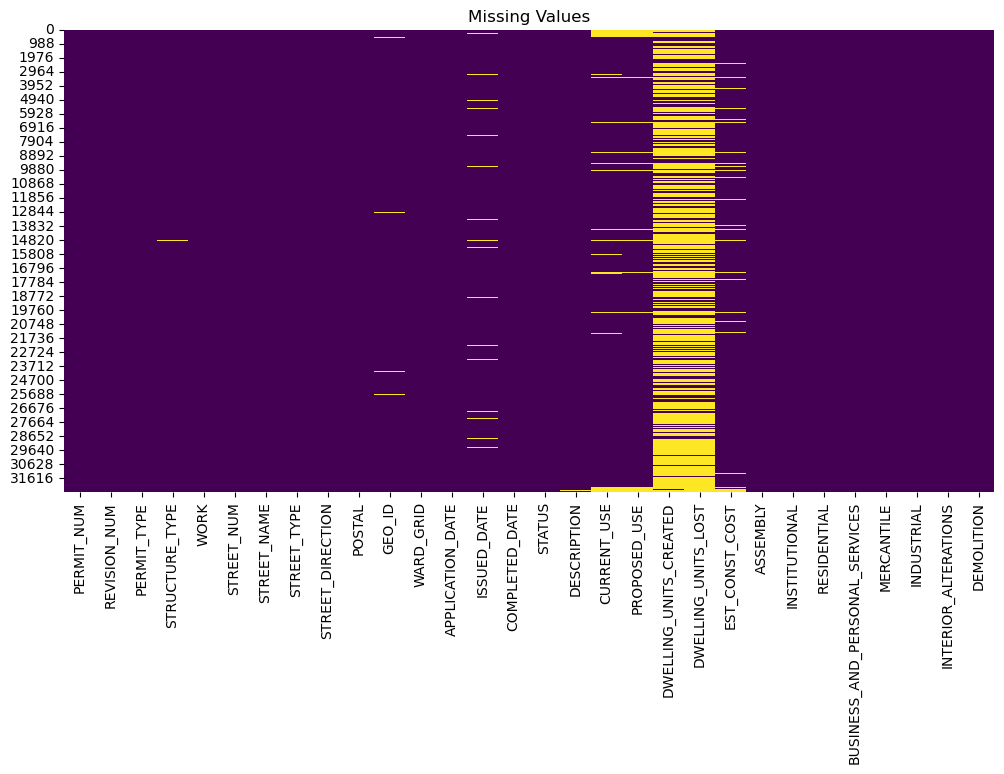

In [12]:
#visualize using heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)
plt.title('Missing Values')
plt.show()

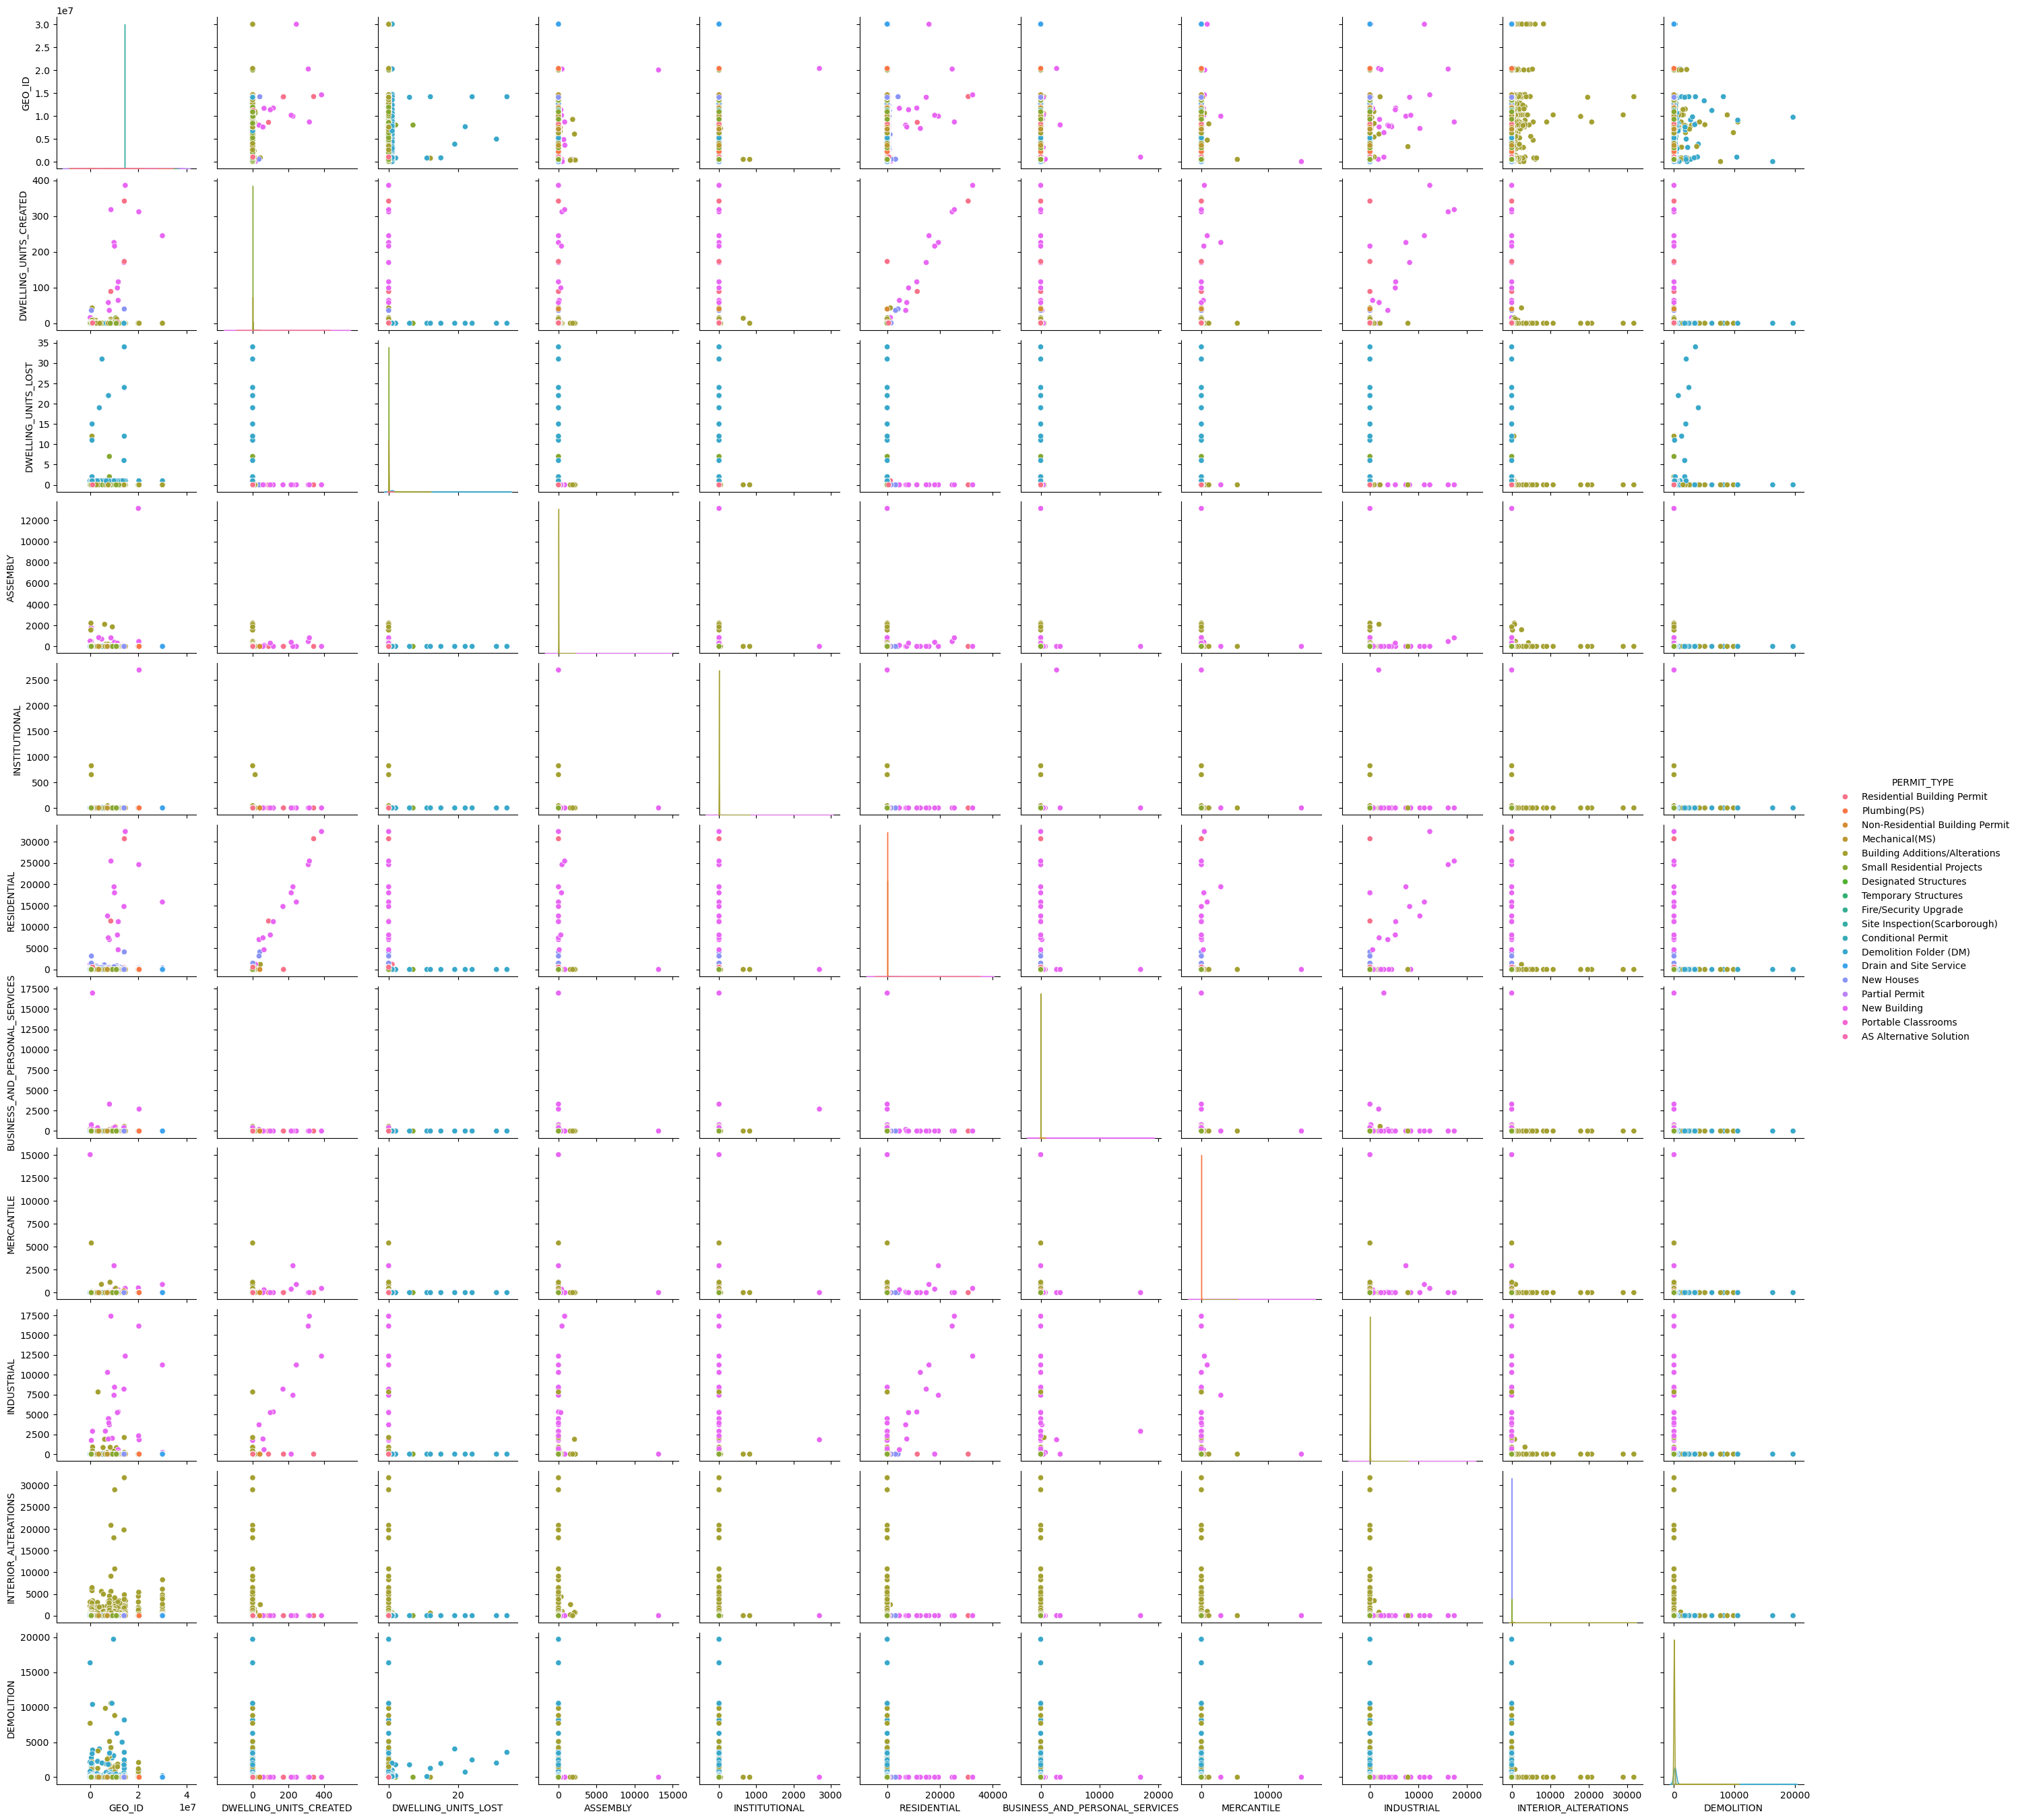

In [14]:
#Pair Plot

sns.pairplot(df,hue='PERMIT_TYPE')
#working with pairing only specific columns
#sns.pairplot(df,vars=['PERMIT_TYPE,STRUCTURE_TYPE,STREET_NUM'])
sns.suptitle("Pair Plot of ")
plt.show()

In [15]:
#filling missing values
df_cleaned = df.fillna(0)

In [17]:
df_cleaned.isnull().sum()

PERMIT_NUM                        0
REVISION_NUM                      0
PERMIT_TYPE                       0
STRUCTURE_TYPE                    0
WORK                              0
STREET_NUM                        0
STREET_NAME                       0
STREET_TYPE                       0
STREET_DIRECTION                  0
POSTAL                            0
GEO_ID                            0
WARD_GRID                         0
APPLICATION_DATE                  0
ISSUED_DATE                       0
COMPLETED_DATE                    0
STATUS                            0
DESCRIPTION                       0
CURRENT_USE                       0
PROPOSED_USE                      0
DWELLING_UNITS_CREATED            0
DWELLING_UNITS_LOST               0
EST_CONST_COST                    0
ASSEMBLY                          0
INSTITUTIONAL                     0
RESIDENTIAL                       0
BUSINESS_AND_PERSONAL_SERVICES    0
MERCANTILE                        0
INDUSTRIAL                  

In [20]:
df_cleaned_new=df_cleaned.dropna(axis=0,how='any')

In [21]:
df_cleaned_new.shape

(32577, 30)

In [23]:
df_cleaned_new.drop(['INTERIOR_ALTERATIONS','DEMOLITION'],axis=1,inplace=True)

In [24]:
df_cleaned_new.shape

(32577, 28)

In [26]:
#working with outliers
numeric_df = df.select_dtypes(include=['number'])
clf = IsolationForest(contamination=0.1)
outliers_if = clf.fit_predict(numeric_df.dropna(axis=1))
print(df[outliers_if==-1])

          PERMIT_NUM REVISION_NUM                     PERMIT_TYPE  \
0      00 119016 000            0     Residential Building Permit   
2      00 124060 CMB            0     Residential Building Permit   
6      00 130340 CMB            0     Residential Building Permit   
7      00 130342 CMB            0     Residential Building Permit   
8      00 130343 CMB            0     Residential Building Permit   
...              ...          ...                             ...   
31981  18 229279 DEM            0          Demolition Folder (DM)   
31998  18 230479 BLD            0      Small Residential Projects   
32084  18 233687 BLD            0  Building Additions/Alterations   
32519  99 101249 COM            0     Residential Building Permit   
32530  99 114247 CMB            0     Residential Building Permit   

                         STRUCTURE_TYPE                  WORK STREET_NUM  \
0                          SFD/Detached          New Building        548   
2                  

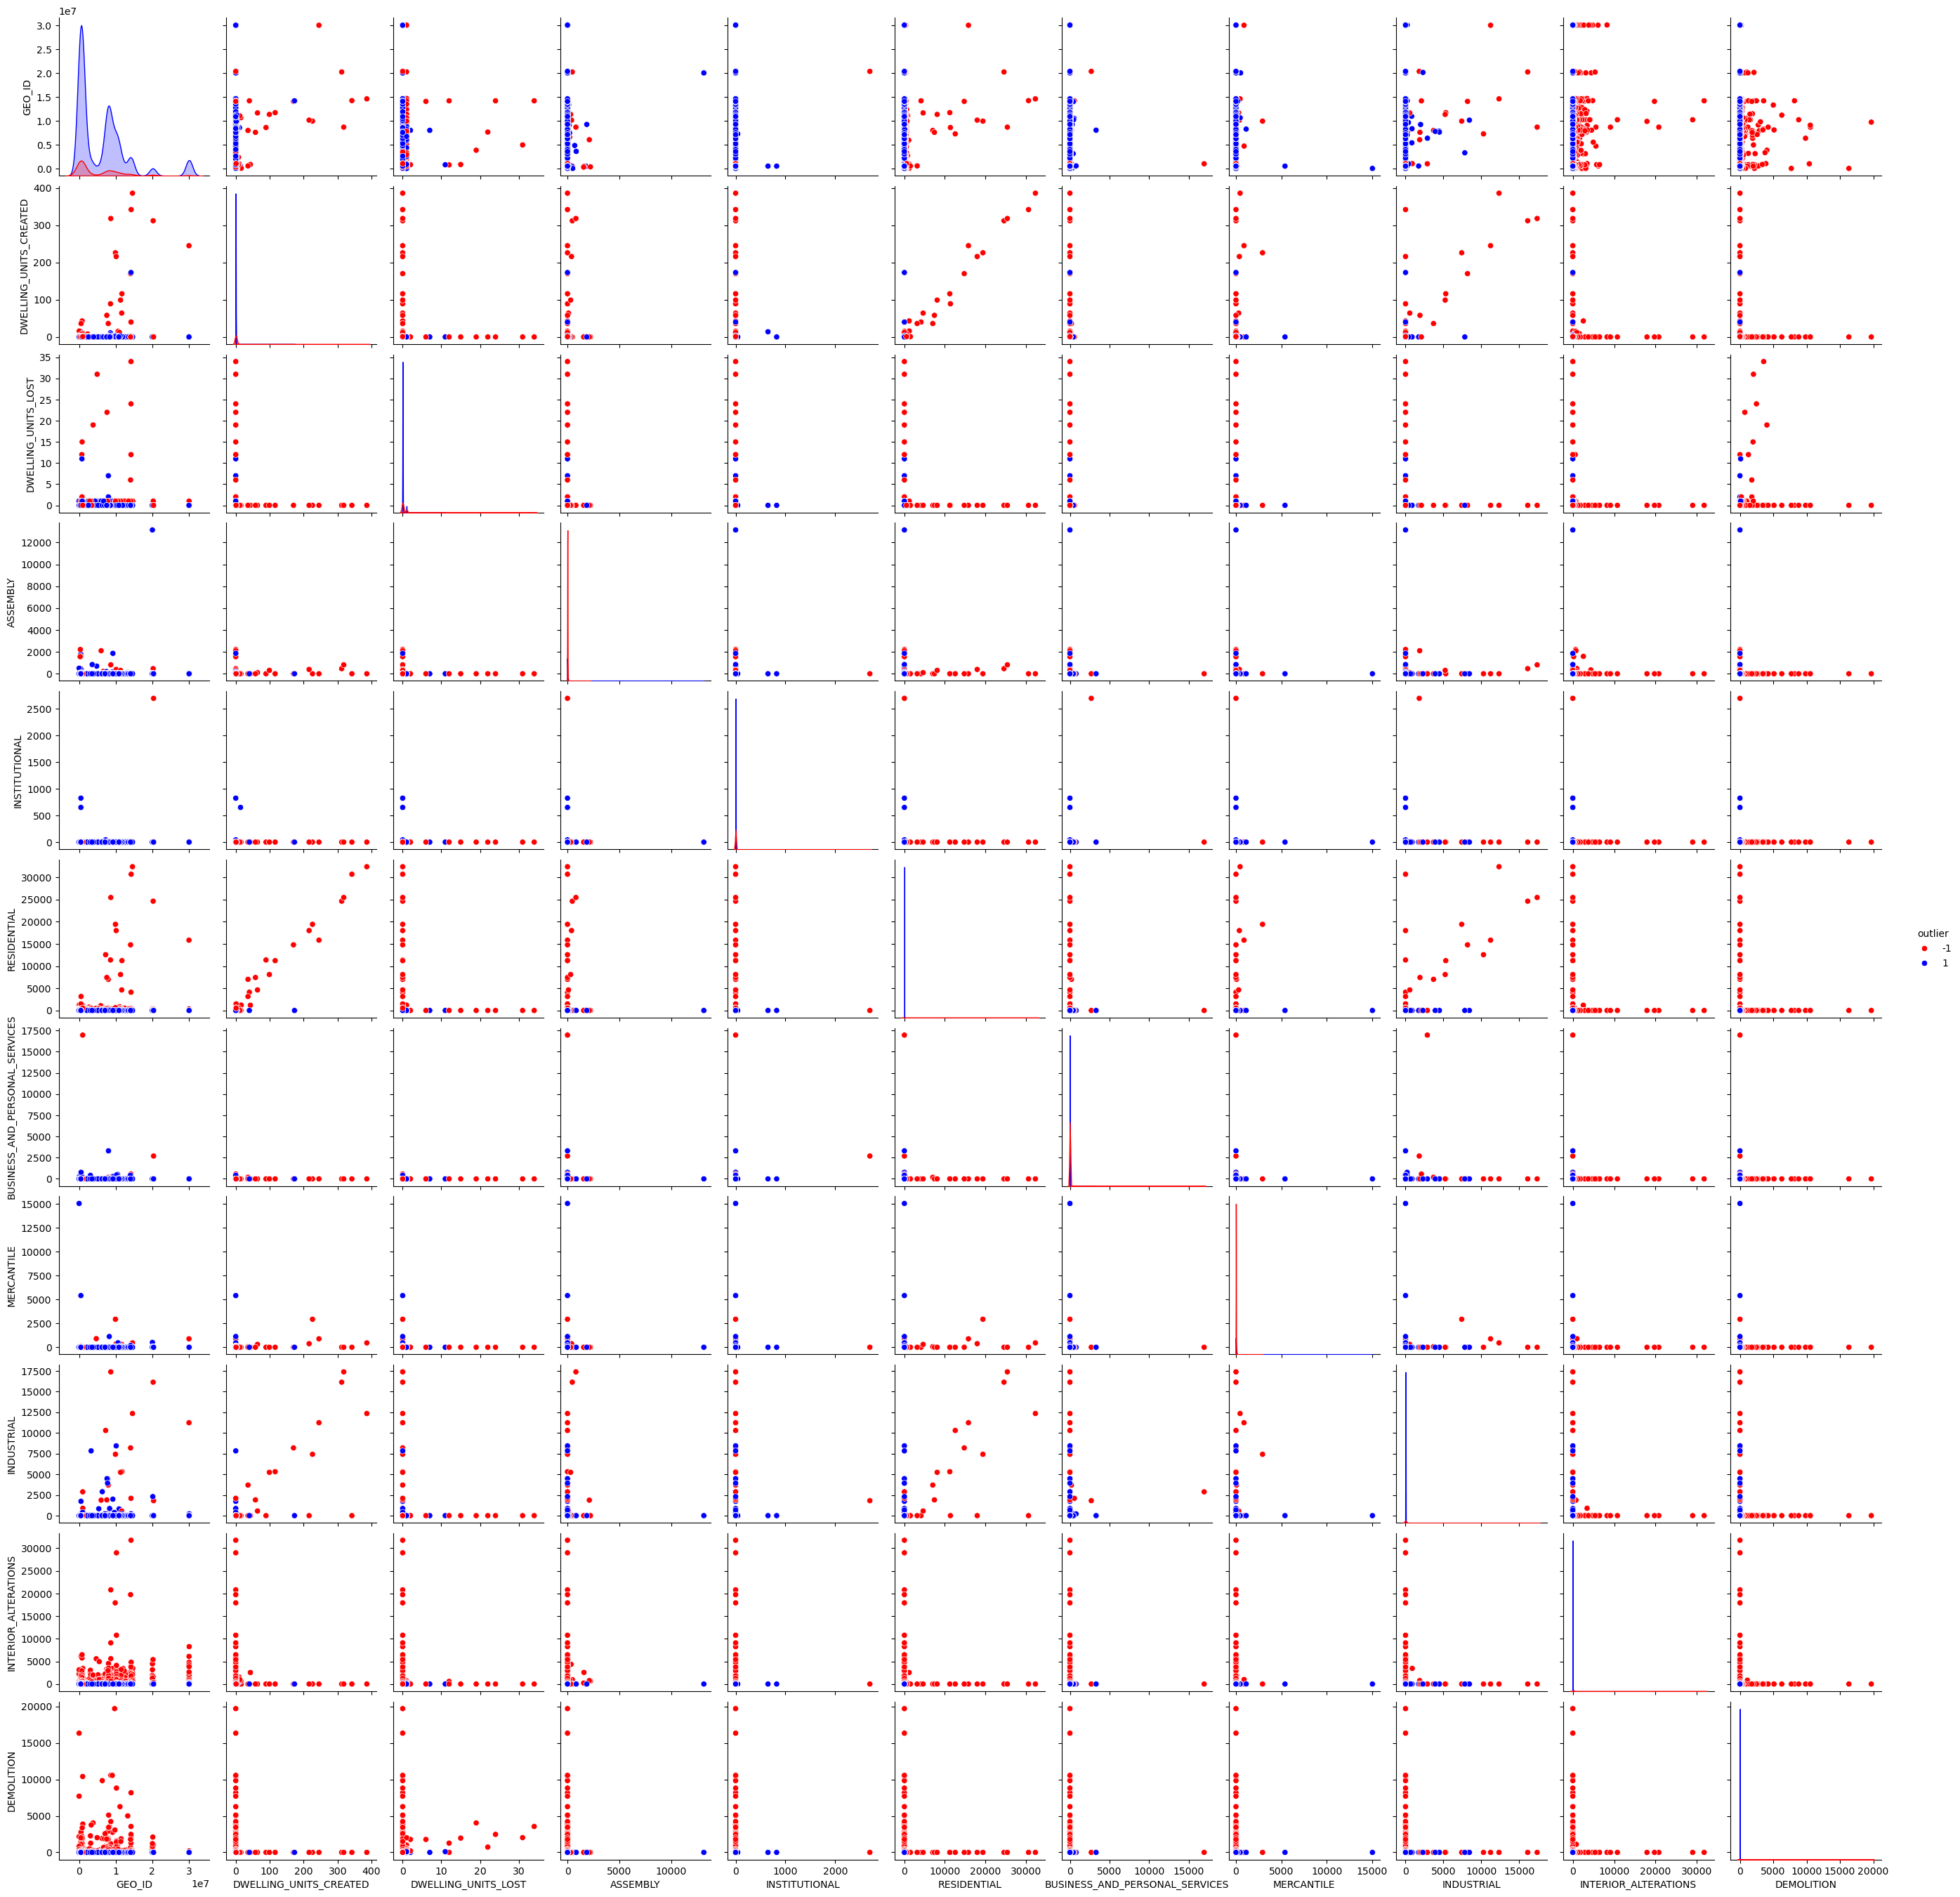

In [27]:
numeric_df['outlier']=outliers_if
sns.pairplot(numeric_df,hue='outlier',palette={1:'blue',-1:'red'})
plt.show()

In [38]:
#TOP 10 STRUCTURE TYPES
structuredTypes  = df['STRUCTURE_TYPE'].value_counts()
structuredTypes_TopTen = structuredTypes.head(10)

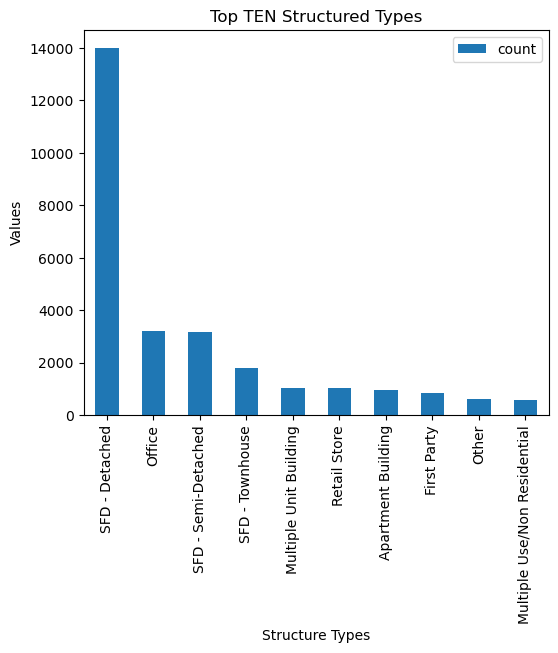

In [42]:
structuredTypes_TopTen.plot(kind='bar',figsize=(6,5))
plt.title('Top TEN Structured Types')
plt.ylabel('Values')
plt.xlabel('Structure Types')
plt.show()

# Permit Type Distribution

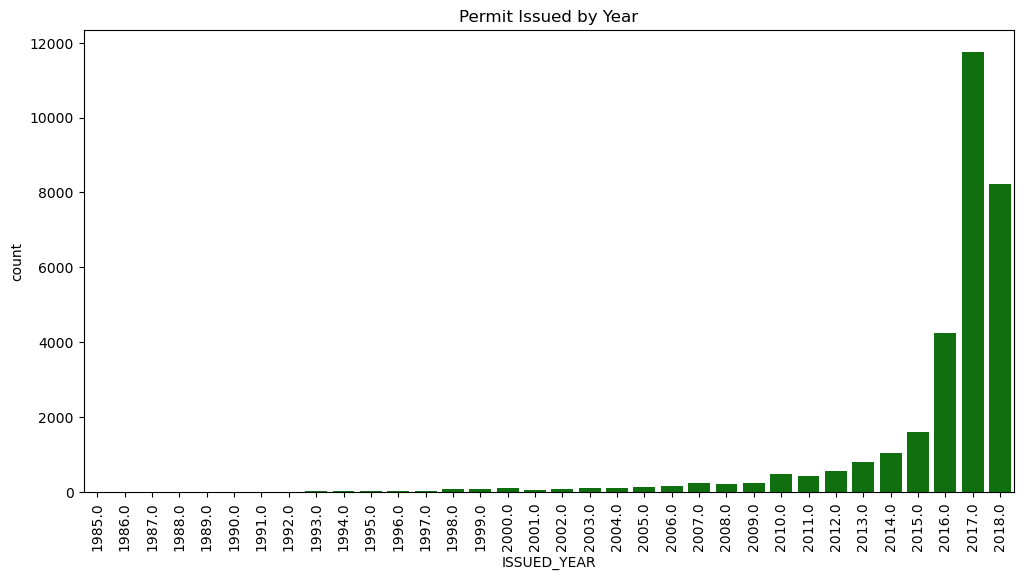

In [44]:
#plot year-wise permits

plt.figure(figsize=(12,6))
df['ISSUED_YEAR'] = pd.to_datetime(df['ISSUED_DATE']).dt.year
sns.countplot(data=df,x='ISSUED_YEAR',color='green')
plt.xticks(rotation=90)
plt.title('Permit Issued by Year')
plt.show()

In [ ]:
semi_detached_df = df[df['STRUTURE_TYPES']